<a href="https://colab.research.google.com/github/xmendevs/Predictive-Modeling-Churn/blob/main/Churnn_Analysis_of_Zeolin_Limited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction Analysis**

## **Problem Statement**
In the highly competitive and saturated telecommunications industry, customer churn represents a significant threat to profitability and market share. Zeolin Limited, a global telecommunications leader, is experiencing a persistent and costly loss of customers. This churn not only results in direct revenue loss but also erodes brand value and stifles growth.

The current reactive approach addressing customer issues only after they have decided to leave is inefficient and unsustainable. To proactively mitigate this threat, Zeolin Limited must move beyond symptom management. The challenge is to identify customers at high risk of churning before they leave, enabling targeted retention strategies. This project aims to develop a predictive model that uncovers the hidden drivers of churn and provides an early warning system, transforming our retention efforts from reactive to proactive and safeguarding our future growth.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the first and csv files
df_1 = pd.read_csv(r'/content/churn-bigml-80.csv')
df_2 = pd.read_csv(r'/content/churn-bigml-20.csv')

In [ ]:
# Concatenate the two DataFrames to one
df = pd.concat([df_1, df_2], ignore_index=True)

# Print the number of rows in the combined DataFrame
print(f"Number of rows in the combined file: {len('combined_df')}")

Number of rows in the combined file: 11


In [ ]:
df.shape

(3333, 20)

In [ ]:
# Saving the new DataFrame to a new CSV file
df.to_csv('combined_Churn_data.csv', index=False)

print("\nSuccess! The combined CSV file has been saved as 'combined_data.csv'.")


Success! The combined CSV file has been saved as 'combined_data.csv'.


In [ ]:
df.head(20)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [ ]:
df['Churn'] = df['Churn'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Exploratory Data Analysis

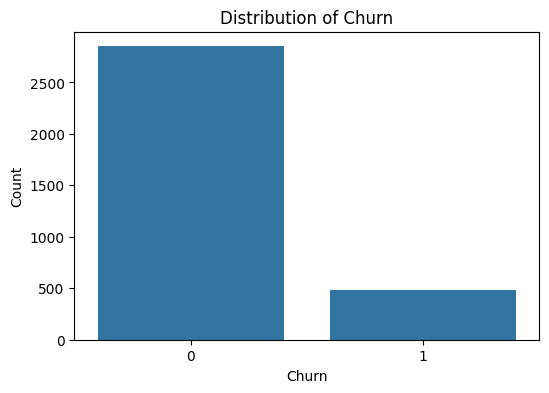

In [ ]:
# Plot the distribution of the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Exploring Numerical Columns

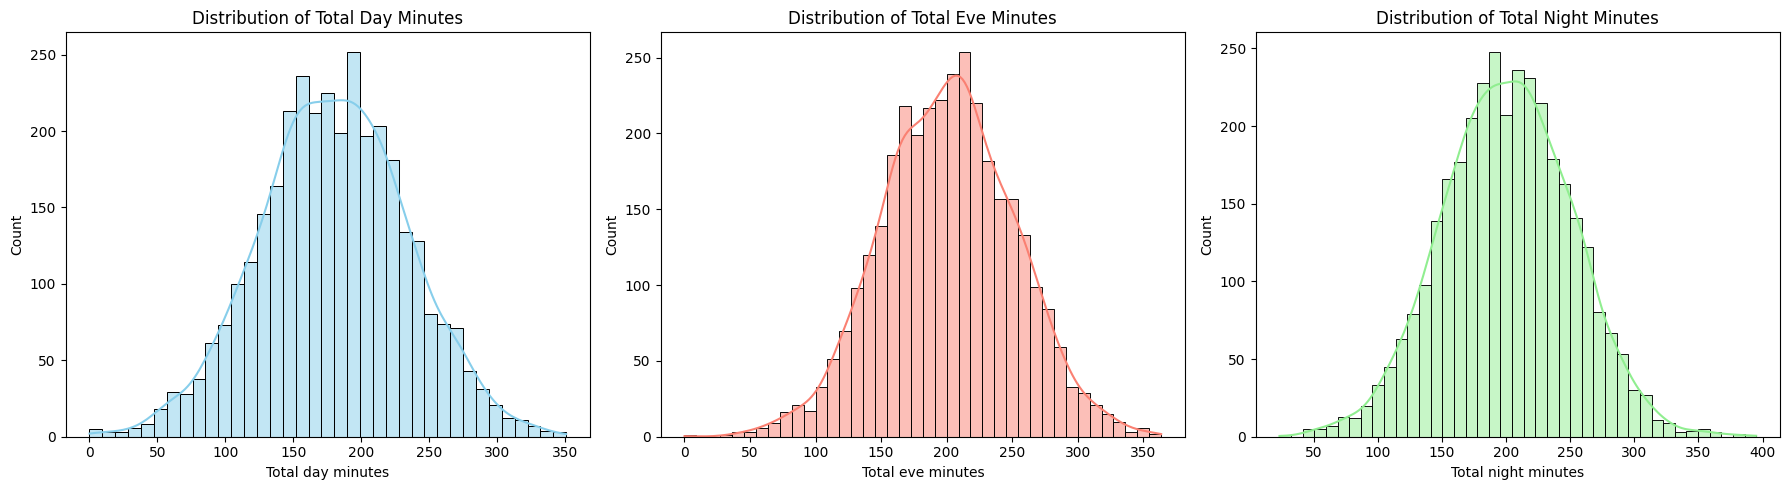

In [ ]:
# Create histograms for key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Total day minutes'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Total Day Minutes')

sns.histplot(df['Total eve minutes'], ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Distribution of Total Eve Minutes')

sns.histplot(df['Total night minutes'], ax=axes[2], kde=True, color='lightgreen')
axes[2].set_title('Distribution of Total Night Minutes')

plt.tight_layout()
plt.show()

###  Analyze Categorical Features
Finally, we can look at the relationship between the categorical features (like International plan and Voice mail plan) and churn. This helps us understand which services might be contributing to churn.

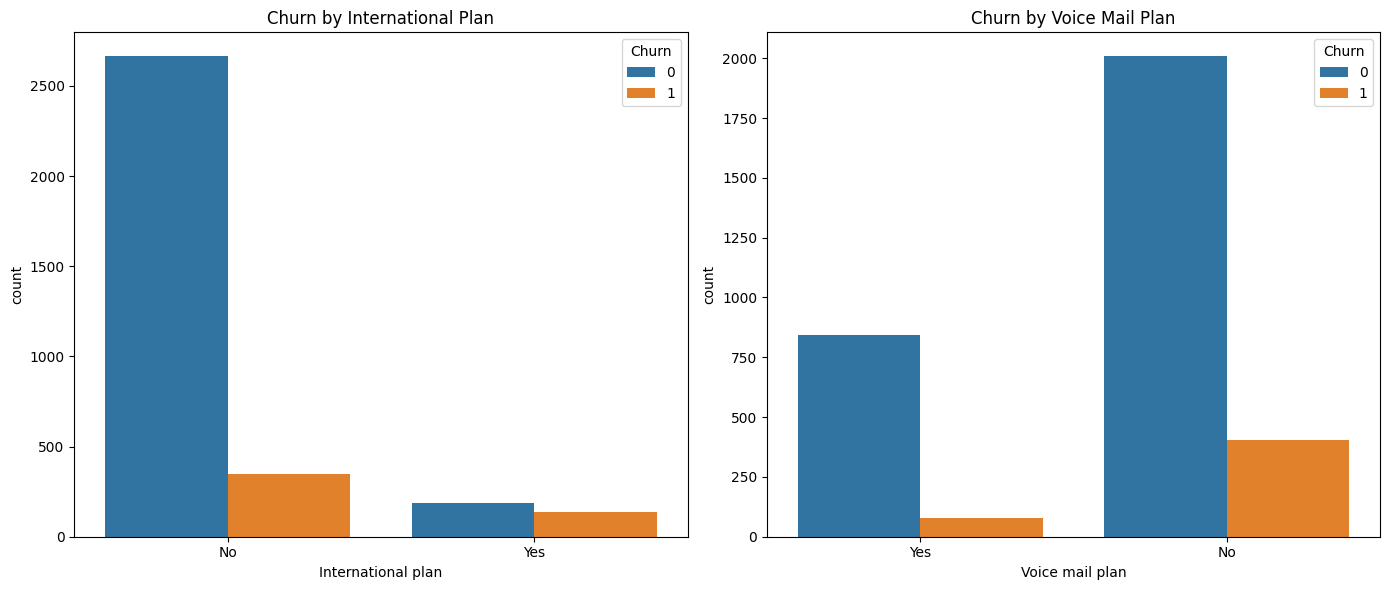

In [ ]:
# Analyze the relationship between categorical features and churn
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 'International plan' vs. 'Churn'
sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Churn by International Plan')

# Plot 'Voice mail plan' vs. 'Churn'
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Churn by Voice Mail Plan')

plt.tight_layout()
plt.show()

## Data preprocessing

###  Categorical Data: Columns like State, International plan, and Voice mail plan are currently in text format. Machine learning models require numerical input, so we'll need to convert these to numbers.

In [ ]:
 #Drop the 'State' column. While 'State' is a categorical variable, with 50 unique values
# it would lead to a very high number of dummy variables, potentially making the model
# difficult to interpret and prone to overfitting .. .. .. .. .. ..
df = df.drop('State', axis=1)

In [ ]:
# 3. Handle remaining categorical features using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols,drop_first = False)

In [ ]:
df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,True,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,True,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,True,False,True,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,False,True,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,...,11.14,11.5,7,3.11,2,0,True,False,False,True
3329,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,...,10.33,8.1,3,2.19,1,0,True,False,False,True
3330,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,...,9.45,13.2,8,3.56,3,0,True,False,True,False
3331,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,...,8.72,11.6,4,3.13,1,0,True,False,True,False


In [ ]:
df.rename(columns={'International plan_Yes': 'International plan','Voice mail plan_Yes':'Voice mail plan'}, inplace=True)

In [ ]:
df


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan,Voice mail plan_No,Voice mail plan
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,True,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,True,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,True,False,True,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,False,True,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,...,11.14,11.5,7,3.11,2,0,True,False,False,True
3329,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,...,10.33,8.1,3,2.19,1,0,True,False,False,True
3330,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,...,9.45,13.2,8,3.56,3,0,True,False,True,False
3331,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,...,8.72,11.6,4,3.13,1,0,True,False,True,False


In [ ]:
#Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

## Class Imbalanced usig Smote

In [ ]:
#Importing Dependecies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42, stratify=y)

In [ ]:
# Scale numerical features
# Identify numerical columns (excluding the new dummy variables and the target)
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data only to avoid data leakage
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])


In [ ]:
# Transform the test data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# Apply SMOTE to the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Model Building and Evaluation

In [ ]:
#importing dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# --- 1. Logistic Regression ---
print("Training Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
lr_pred = lr_model.predict(X_test)
print("\n--- Evaluation of Logistic Regression ---")
print(classification_report(y_test, lr_pred))
print("-" * 50)

# --- 2. Decision Tree Classifier ---
print("\nTraining Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
dt_pred = dt_model.predict(X_test)
print("\n--- Evaluation of Decision Tree ---")
print(classification_report(y_test, dt_pred))
print("-" * 50)

# --- 3. Random Forest Classifier ---
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
rf_pred = rf_model.predict(X_test)
print("\n--- Evaluation of Random Forest Classifier ---")
print(classification_report(y_test, rf_pred))
print("-" * 50)

Training Logistic Regression Model...

--- Evaluation of Logistic Regression ---
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       513
           1       0.38      0.74      0.50        87

    accuracy                           0.79       600
   macro avg       0.67      0.77      0.69       600
weighted avg       0.87      0.79      0.81       600

--------------------------------------------------

Training Decision Tree Classifier...

--- Evaluation of Decision Tree ---
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       513
           1       0.72      0.82      0.77        87

    accuracy                           0.93       600
   macro avg       0.85      0.88      0.86       600
weighted avg       0.93      0.93      0.93       600

--------------------------------------------------

Training Random Forest Classifier...

--- Evaluation of Random Forest Classifier ---
  

## Hyperparameter Tuning with Grid Search
Hyperparameter tuning will test different combinations of settings for the Random Forest model to find the set that provides the best possible performance. We'll use the f1_macro score to ensure the model's performance on both classes is optimized.


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have your SMOTE-balanced training data (X_train_smote, y_train_smote)
# and your original test data (X_test, y_test) ready from the previous steps.

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the SMOTE-enhanced training data
print("Performing Grid Search for Hyperparameter Tuning...")
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and the best score
print("\nBest Parameters found by Grid Search:")
print(grid_search.best_params_)

print("\nBest F1-Macro Score from Grid Search:")
print(f"{grid_search.best_score_:.4f}")

# Get the best model and evaluate on the original test set
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

print("\n--- Evaluation of Tuned Random Forest Model ---")
print(classification_report(y_test, best_rf_pred))

Performing Grid Search for Hyperparameter Tuning...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters found by Grid Search:
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}

Best F1-Macro Score from Grid Search:
0.9587

--- Evaluation of Tuned Random Forest Model ---
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       513
           1       0.90      0.82      0.86        87

    accuracy                           0.96       600
   macro avg       0.93      0.90      0.92       600
weighted avg       0.96      0.96      0.96       600



## Visualization and Interpreting of Results

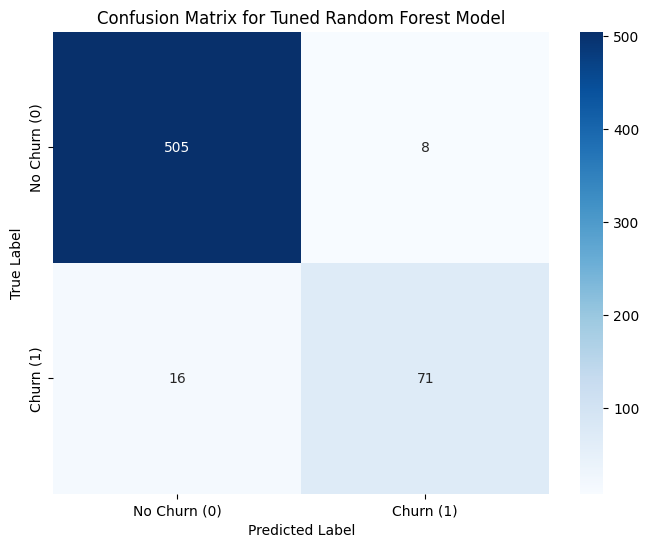

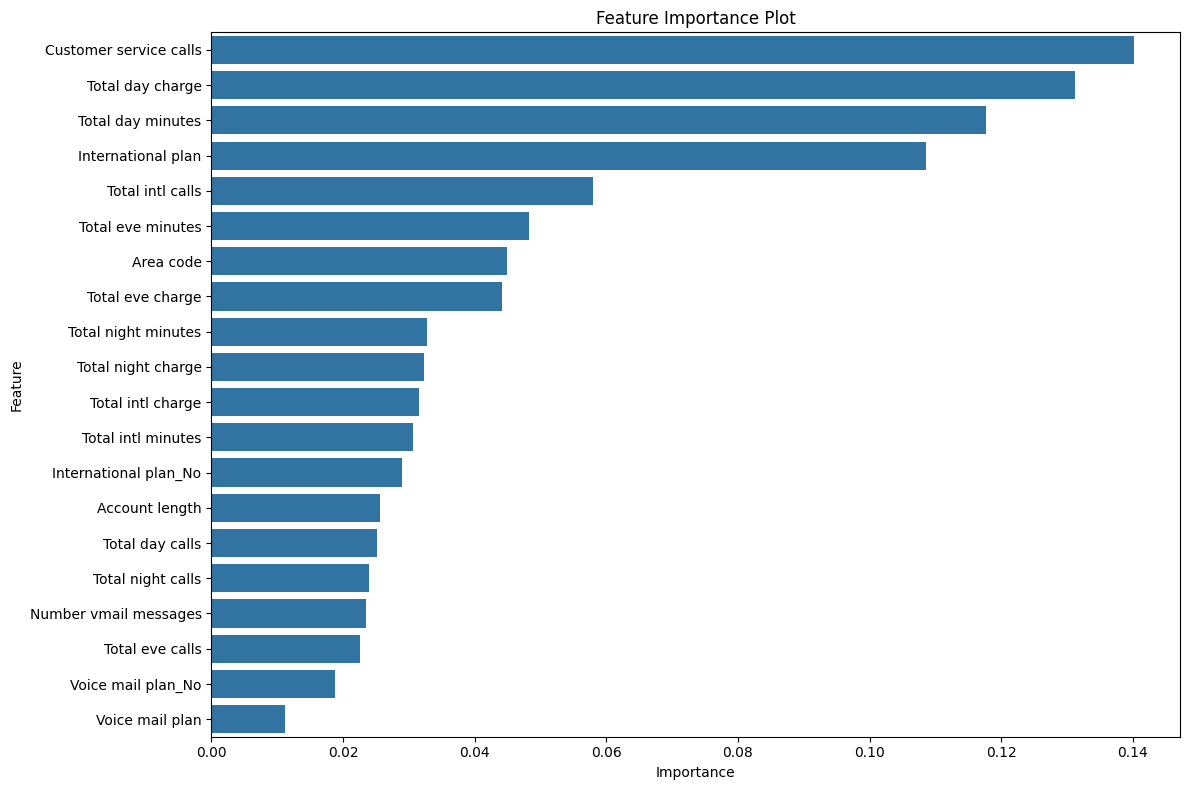


Sorted Feature Importances:
                   Feature  Importance
15  Customer service calls    0.140134
5         Total day charge    0.131169
3        Total day minutes    0.117704
17      International plan    0.108540
13        Total intl calls    0.057998
6        Total eve minutes    0.048201
1                Area code    0.044966
8         Total eve charge    0.044222
9      Total night minutes    0.032707
11      Total night charge    0.032294
14       Total intl charge    0.031570
12      Total intl minutes    0.030689
16   International plan_No    0.028938
0           Account length    0.025702
4          Total day calls    0.025147
10       Total night calls    0.023996
2    Number vmail messages    0.023516
7          Total eve calls    0.022544
18      Voice mail plan_No    0.018785
19         Voice mail plan    0.011179


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


# 1. Generate and plot the Confusion Matrix
best_rf_pred = best_rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, best_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.savefig('confusion_matrix.png')
plt.show()

# 2. Get and plot Feature Importances
importances = best_rf_model.feature_importances_
feature_names = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# You can also print the sorted list of feature importances
print("\nSorted Feature Importances:")
print(feature_importance_df)

**Here's a breakdown of what the plot is saying:**

Importance: The height of each bar represents the relative importance of that feature. A taller bar means the feature had a greater impact on whether the model predicted a customer would churn.

1. The Critical Churn Drivers (Top 3)
The project's success hinges on addressing the top three features, as they hold the vast majority of predictive power:

Customer service calls (Highest Rank): This feature is the strongest predictor of churn. It clearly indicates high customer frustration and unresolved issues. Action: Focus retention budget on customers who exceed 3 or 4 service calls.

International plan_Yes (Second Highest): This feature highlights a high-risk customer segment. It's not the plan itself, but the fact that customers in this segment are highly motivated to leave, likely due to quality or cost concerns. Action: Investigate and improve the international service experience.

Total day charge (Third Highest): This is a direct measure of pricing sensitivity and dissatisfaction with the bill. Action: Proactively offer plan changes to high-charge customers to prevent "bill shock."

2. The Least Important Features
Features near the bottom of the chart had minimal influence on the model's predictions:

Voice mail plan_Yes and Total eve calls have near-zero importance. This tells you that any resources spent focusing retention efforts purely on these features would be inefficient and wasteful.

The plot confirms that the business must shift its focus away from peripheral issues and toward customer service experience and cost management to effectively reduce churn.


---

The top three features are what your Random Forest model relied on most to make its predictions. They represent the clearest, most urgent signals of customer dissatisfaction for Zeolin Limited.

1. Customer service calls (Highest Priority)
Why it Matters: This is the strongest predictive feature. It signals high customer frustration, indicating that customers are experiencing unresolved issues and are actively seeking alternatives.

Actionable Insight: The number of calls to customer service acts as an Early Warning System (EWS) trigger. The company should flag any customer who exceeds a low threshold (e.g., 3-4 calls) for immediate, high-touch intervention by a dedicated retention specialist.

2. International plan (High-Risk Segment Flag)
Why it Matters: The model shows that customers who have the International Plan are in the highest-risk segment. This doesn't mean the plan causes churn, but it means customers in this premium segment are highly sensitive to failures in service quality, connection reliability, or billing transparency.

Actionable Insight: Zeolin must prioritize the service experience for all International Plan holders. Use this feature to target retention efforts at high-value customers who are most likely to be experiencing problems.

3. Total day charge (Pricing Sensitivity)
Why it Matters: This feature directly links the financial cost of service to churn. Customers with high charges during peak hours are highly dissatisfied with their bills.

Actionable Insight: Implement a system to proactively monitor and reach out to customers whose Total day charge is consistently high. Offering a better-suited plan or a small proactive discount can prevent "bill shock" and convert a high-cost user into a retained, satisfied customer.